# Instanciate the 'train' and 'test' dataloaders

In [1]:
from ocdc_dataloader import *

dataset_dir = "../../datasets/OCDC"

batch_size = 6
patch_size = (640, 640)
color_model = "LAB"
dataloaders = create_dataloader(tile_size="{}x{}".format(patch_size[0], patch_size[1]),
                                batch_size=batch_size, 
                                shuffle=True,
                                img_input_size=patch_size,
                                img_output_size=patch_size,
                                dataset_dir=dataset_dir,
                                color_model=color_model)

dataset_train_size = len(dataloaders['train'].dataset)
dataset_test_size = len(dataloaders['test'].dataset)

2021-02-02 08:58:23,460 :: INFO load_dataset :: [training] ../../datasets/OCDC/training
2021-02-02 08:58:23,545 :: INFO load_dataset :: [testing] ../../datasets/OCDC/testing
2021-02-02 08:58:23,636 :: INFO create_dataloader :: Train images (640x640): 840 (augmentation: True)
2021-02-02 08:58:23,640 :: INFO create_dataloader :: Test images (640x640): 180 (augmentation: False)


# Show some train images

2021-02-02 08:58:42,285 :: INFO dataset_show :: Batch 1: 6/840 images torch.Size([6, 3, 640, 640]) masks torch.Size([6, 640, 640])


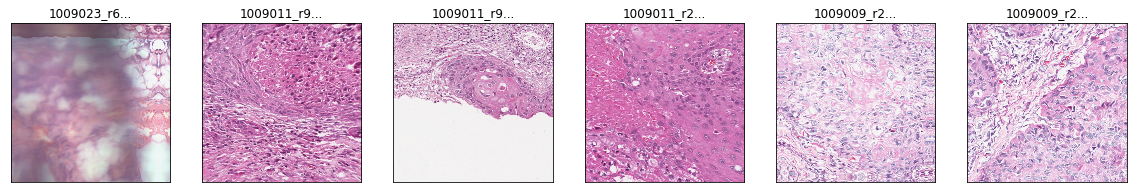

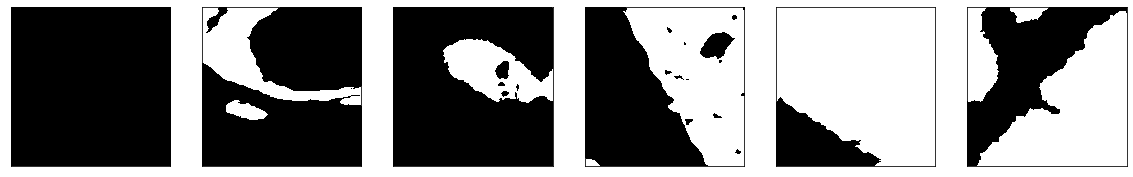

In [3]:
dataset_show(dataloaders['train'], batch_size=batch_size, show_masks=True, row_limit=1)

# Show some test images

2021-02-02 08:59:05,030 :: INFO dataset_show :: Batch 1: 6/180 images torch.Size([6, 3, 640, 640]) masks torch.Size([6, 640, 640])


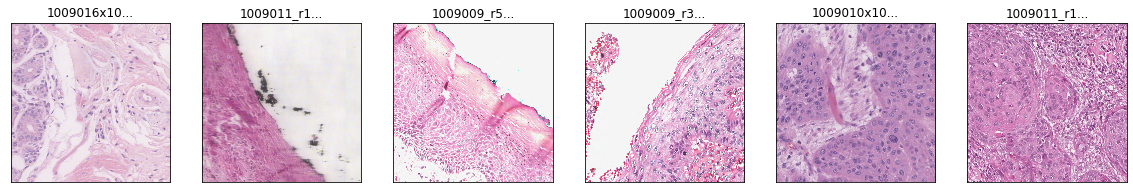

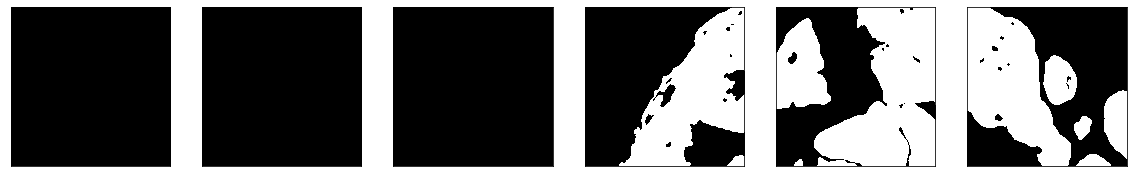

In [6]:
dataset_show(dataloaders['test'], batch_size=batch_size, show_masks=True, row_limit=1)